A. Comparing Logistic Regression, Random Forest, Support Vector Machines and XGBoost models
-------------------------------------------------------------------------------------------

In [197]:
#libraries
# Data Processing
import pandas as pd
import numpy as np

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_recall_curve, roc_auc_score, auc, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import warnings

warnings.filterwarnings('ignore')

1a. Loading Y test, Y predict and performance metrics for Logistic Regression

In [209]:
LR_y_test = pd.read_csv('results/LR_Ytest.csv')
LR_y_test = LR_y_test-1 #to use the same class encoding throught

LR_y_pred = pd.read_csv('results/LR_Ypred.csv')
LR_y_pred = LR_y_pred-1 # to use the same class encoding through

LR_y_pred_score = pd.read_csv('results/LR_Y_pred_score.csv')
LR_y_pred_score = LR_y_pred_score.to_numpy()

LR_metrics = pd.read_csv('results/LR_performance_metrics.csv')

LR_perm_import = pd.read_csv('results/LR_Importance.csv')

1b. Loading Y test, Y predict and performance metrics for Random Forest

In [199]:
RF_y_test = pd.read_csv('results/RF_Ytest.csv')
RF_y_pred = pd.read_csv('results/RF_Ypred.csv')
RF_y_pred_score = pd.read_csv('results/RF_Y_pred_score.csv')
RF_y_pred_score = RF_y_pred_score.to_numpy()

RF_metrics = pd.read_csv('results/RF_performance_metrics.csv')

RF_gini_import = pd.read_csv('results/RF_Gini_Importance.csv')
RF_perm_import = pd.read_csv('results/RF_Perm_Importance.csv')

1c. Loading Y test, Y predict and performance metrics for Support Vector Machines

In [200]:
SVM_y_test = pd.read_csv('results/RF_Ytest.csv')
SVM_y_pred = pd.read_csv('results/RF_Ypred.csv')
SVM_y_pred_score = pd.read_csv('results/RF_Y_pred_score.csv')
SVM_y_pred_score = SVM_y_pred_score.to_numpy()

SVM_metrics = pd.read_csv('results/SVM_performance_metrics.csv')

SVM_gini_import = pd.read_csv('results/RF_Gini_Importance.csv')
SVM_perm_import = pd.read_csv('results/RF_Perm_Importance.csv')

1d. Loading Y test, Y predict and performance metrics for XGBoost

In [201]:
XGBoost_y_test = pd.read_csv('results/RF_Ytest.csv')
XGBoost_y_pred = pd.read_csv('results/RF_Ypred.csv')
XGBoost_y_pred_score = pd.read_csv('results/RF_Y_pred_score.csv')
XGBoost_y_pred_score = XGBoost_y_pred_score.to_numpy()

XGBoost_metrics = pd.read_csv('results/XGBoost_performance_metrics.csv')

XGBoost_gini_import = pd.read_csv('results/RF_Gini_Importance.csv')
XGBoost_perm_import = pd.read_csv('results/RF_Perm_Importance.csv')

2. Side-by-side Confusion Matrices
---------------------------------------------------------

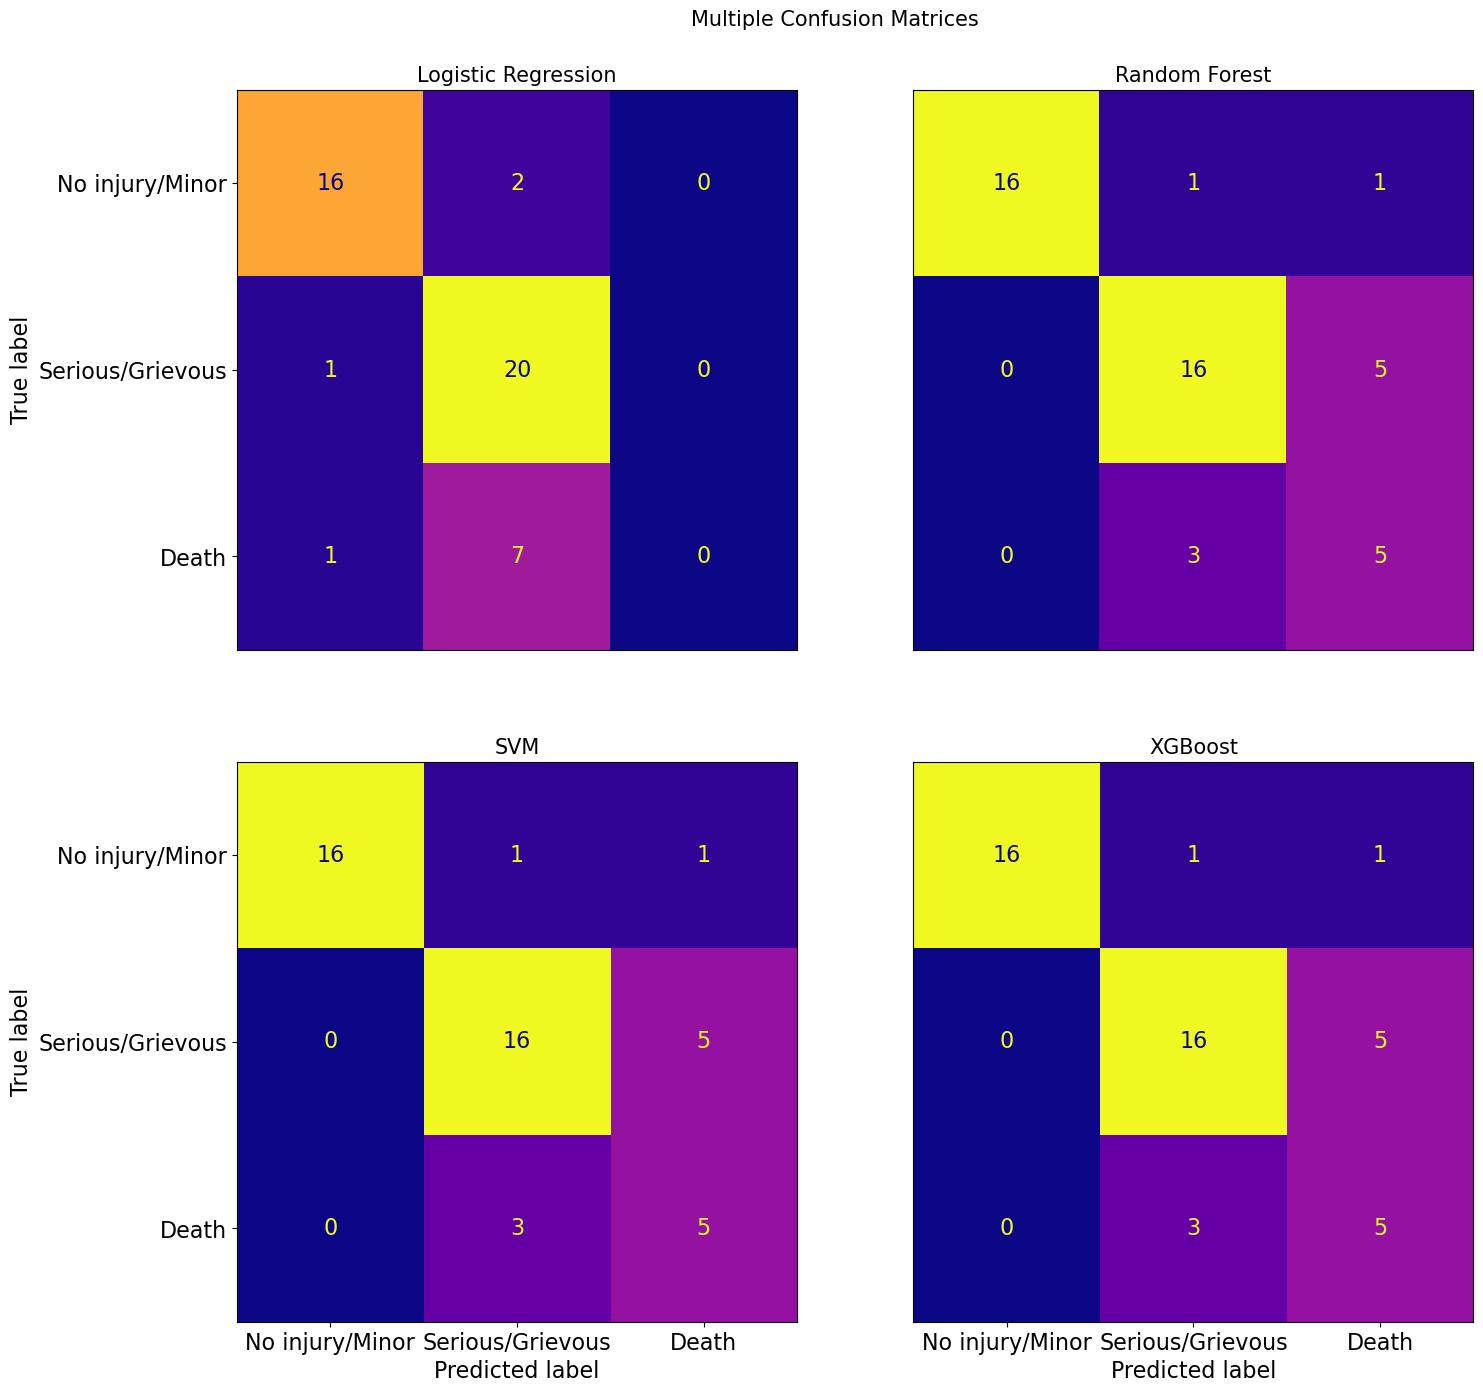

In [202]:
# Set formatting and styling options for the confusion matrices
title_size = 15
plt.rcParams.update({'font.size':16})
display_labels = ['No injury/Minor','Serious/Grievous','Death']
colorbar = False
cmap = "plasma"  


# Create subplots for given confusion matrices
f, axes = plt.subplots(2, 2, figsize=(16, 16))

# Plot the first confusion matrix (Logistic Regression ) at position (0, 0)
RFcm = confusion_matrix(LR_y_test, LR_y_pred)
axes[0, 0].set_title("Logistic Regression", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[0, 0], colorbar=colorbar)

# Remove x-axis labels and ticks LR
axes[0, 0].xaxis.set_ticklabels(['', '', ''])
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#------------------------------------------------------------------------------

# Plot the second confusion matrix (Random Forest) at position (0, 1)
RFcm = confusion_matrix(RF_y_test, RF_y_pred)
axes[0, 1].set_title("Random Forest", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[0, 1], colorbar=colorbar)

# Remove x and y-axis labels and ticks RF
axes[0, 1].xaxis.set_ticklabels(['', '', ''])
axes[0, 1].yaxis.set_ticklabels(['', '', ''])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='both', which='both', bottom=False, left=False)

#------------------------------------------------------------------------------------

# Plot the third confusion matrix (SVM) at position (1, 0)
RFcm = confusion_matrix(SVM_y_test, SVM_y_pred)
axes[1, 0].set_title("SVM", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[1, 0], colorbar=colorbar)

#--------------------------------------------------------------------------------------

# Plot the fourth confusion matrix (XGBoost) at position (1, 1)
RFcm = confusion_matrix(XGBoost_y_test, XGBoost_y_pred)
axes[1,1].set_title("XGBoost", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=RFcm, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[1, 1], colorbar=colorbar)

# Remove x and y-axis labels and ticks for XGBoost
axes[1, 1].yaxis.set_ticklabels(['', '', ''])
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='y', which='both',left=False)

# Set the figure's suptitle and display the plot
f.suptitle("Multiple Confusion Matrices", size=title_size, y=0.93)

plt.show()

# Save the figure as a PDF file
f.savefig("multiple_confusion_matrices.pdf", bbox_inches='tight')

3. Side-by-side Classification Reports
--------------------------------------------------------------------------------

In [203]:
#Logistic Regression Classification Report
LR_report = classification_report(LR_y_test, LR_y_pred, output_dict=True)
df_LR_report = pd.DataFrame(LR_report).transpose()
df_LR_report.drop(df_LR_report.tail(3).index,inplace=True)
df_LR_report2 = df_LR_report.set_axis(['precision_LR', 'recall_LR', 'f1-score_LR', 'support_LR'], axis=1)
#df_LR_report2 = df_LR_report2.T
print(df_LR_report2)

#Random Forest Classification Report 
RF_report = classification_report(RF_y_test, RF_y_pred, output_dict=True)
df_RF_report = pd.DataFrame(RF_report).transpose()
df_RF_report.drop(df_RF_report.tail(3).index,inplace=True)
df_RF_report2 = df_RF_report.set_axis(['precision_RF', 'recall_RF', 'f1-score_RF', 'support_RF'], axis=1)
#df_RF_report2 = df_RF_report2.T
print(df_RF_report2)

#SVM Classification Report 
SVM_report = classification_report(SVM_y_test, SVM_y_pred, output_dict=True)
df_SVM_report = pd.DataFrame(SVM_report).transpose()
df_SVM_report.drop(df_SVM_report.tail(3).index,inplace=True)
df_SVM_report2 = df_SVM_report.set_axis(['precision_SVM', 'recall_SVM', 'f1-score_SVM', 'support_SVM'], axis=1)
#df_SVM_report2 = df_SVM_report2.T
print(df_SVM_report2)

#XGBoost Classification Report 
XGBoost_report = classification_report(XGBoost_y_test, XGBoost_y_pred, output_dict=True)
df_XGBoost_report = pd.DataFrame(XGBoost_report).transpose()
df_XGBoost_report.drop(df_XGBoost_report.tail(3).index,inplace=True)
df_XGBoost_report2 = df_XGBoost_report.set_axis(['precision_XGBoost', 'recall_XGBoost', 'f1-score_XGBoost', 'support_XGBoost'], axis=1)
#df_SVM_report2 = df_SVM_report2.T
print(df_XGBoost_report2)



   precision_LR  recall_LR  f1-score_LR  support_LR
0      0.888889   0.888889     0.888889        18.0
1      0.689655   0.952381     0.800000        21.0
2      0.000000   0.000000     0.000000         8.0
   precision_RF  recall_RF  f1-score_RF  support_RF
0      1.000000   0.888889     0.941176        18.0
1      0.800000   0.761905     0.780488        21.0
2      0.454545   0.625000     0.526316         8.0
   precision_SVM  recall_SVM  f1-score_SVM  support_SVM
0       1.000000    0.888889      0.941176         18.0
1       0.800000    0.761905      0.780488         21.0
2       0.454545    0.625000      0.526316          8.0
   precision_XGBoost  recall_XGBoost  f1-score_XGBoost  support_XGBoost
0           1.000000        0.888889          0.941176             18.0
1           0.800000        0.761905          0.780488             21.0
2           0.454545        0.625000          0.526316              8.0


In [204]:
precision_combined = pd.DataFrame([df_LR_report2['precision_LR'], df_RF_report2['precision_RF'], df_SVM_report2['precision_SVM'], df_XGBoost_report2['precision_XGBoost']])
recall_combined = pd.DataFrame([df_LR_report2['recall_LR'], df_RF_report2['recall_RF'], df_SVM_report2['recall_SVM'], df_XGBoost_report2['recall_XGBoost']])
f1_score_combined = pd.DataFrame([df_LR_report2['f1-score_LR'], df_RF_report2['f1-score_RF'], df_SVM_report2['f1-score_SVM'], df_XGBoost_report2['f1-score_XGBoost']])

                    
report_combined = pd.concat([precision_combined,recall_combined,f1_score_combined])
report_combined2 = report_combined.set_axis(['Minor/No Injury', 'Serious/Grivous', 'Death'], axis=1)
print(report_combined2)

report_combined_file = "results/classification_report_combined.csv"
report_combined2.to_csv(report_combined_file, index=False)

                   Minor/No Injury  Serious/Grivous     Death
precision_LR              0.888889         0.689655  0.000000
precision_RF              1.000000         0.800000  0.454545
precision_SVM             1.000000         0.800000  0.454545
precision_XGBoost         1.000000         0.800000  0.454545
recall_LR                 0.888889         0.952381  0.000000
recall_RF                 0.888889         0.761905  0.625000
recall_SVM                0.888889         0.761905  0.625000
recall_XGBoost            0.888889         0.761905  0.625000
f1-score_LR               0.888889         0.800000  0.000000
f1-score_RF               0.941176         0.780488  0.526316
f1-score_SVM              0.941176         0.780488  0.526316
f1-score_XGBoost          0.941176         0.780488  0.526316


3. Metrics Compasions
--------------------------------------------------------------------------

In [207]:
#metrics_combined = pd.DataFrame([LR_metrics, RF_metrics['Random_Forest_Metrics_Values'], 
#SVM_metrics['Random_Forest_Metrics_Values'], XGBoost_metrics['Random_Forest_Metrics_Values']])

metrics_combined = pd.concat([LR_metrics, RF_metrics['Random_Forest_Metrics_Values'],SVM_metrics['SVM_Metrics_Values'], XGBoost_metrics['XGBoost_Metrics_Values']],  axis = 1)

print(metrics_combined)

metrics_combined_file = "results/metrics_combined.csv"
metrics_combined.to_csv(metrics_combined_file, index=False)

  Performance_Metrics:  LR_Metrics_Values  Random_Forest_Metrics_Values  \
0              F1Score           0.697872                      0.798765   
1    balanced_accuracy           0.613757                      0.758598   
2             accuracy           0.765957                      0.787234   
3        mean fit time                NaN                      0.190881   

   SVM_Metrics_Values  XGBoost_Metrics_Values  
0            0.798765                0.798765  
1            0.758598                0.758598  
2            0.787234                0.787234  
3            0.190881                0.190881  


4. Precision/Recall and ROC curves
----------------------------------------------------------------------------------------

In [208]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

# roc curve
LR_fpr = dict() #false positives Logistic Regression
LR_tpr = dict() #true positives Logistic Regression

RF_fpr = dict() #false positives Random Forest
RF_tpr = dict() #true positives Random Forest

SVM_fpr = dict() #false positives SVM
SVM_tpr = dict() #true positives SVM

XGBoost_fpr = dict() #false positives XG Boost
XGBoost_tpr = dict() #true positives XG Boost

#---------------------------------------

LR_roc_auc = dict() #roc_auc_score LR
RF_roc_auc = dict() #roc_auc_score RF
SVM_roc_auc = dict() #roc_auc_score SVM
XGBoost_roc_auc = dict() #roc_auc_score XGBoost

n_classes = len(set(RF_y_test['injury_severity']))

LR_y_test_bin = label_binarize(LR_y_test, classes=[*range(n_classes)])
RF_y_test_bin = label_binarize(RF_y_test, classes=[*range(n_classes)])
SVM_y_test_bin = label_binarize(SVM_y_test, classes=[*range(n_classes)])
XGBoost_y_test_bin = label_binarize(XGBoost_y_test, classes=[*range(n_classes)])

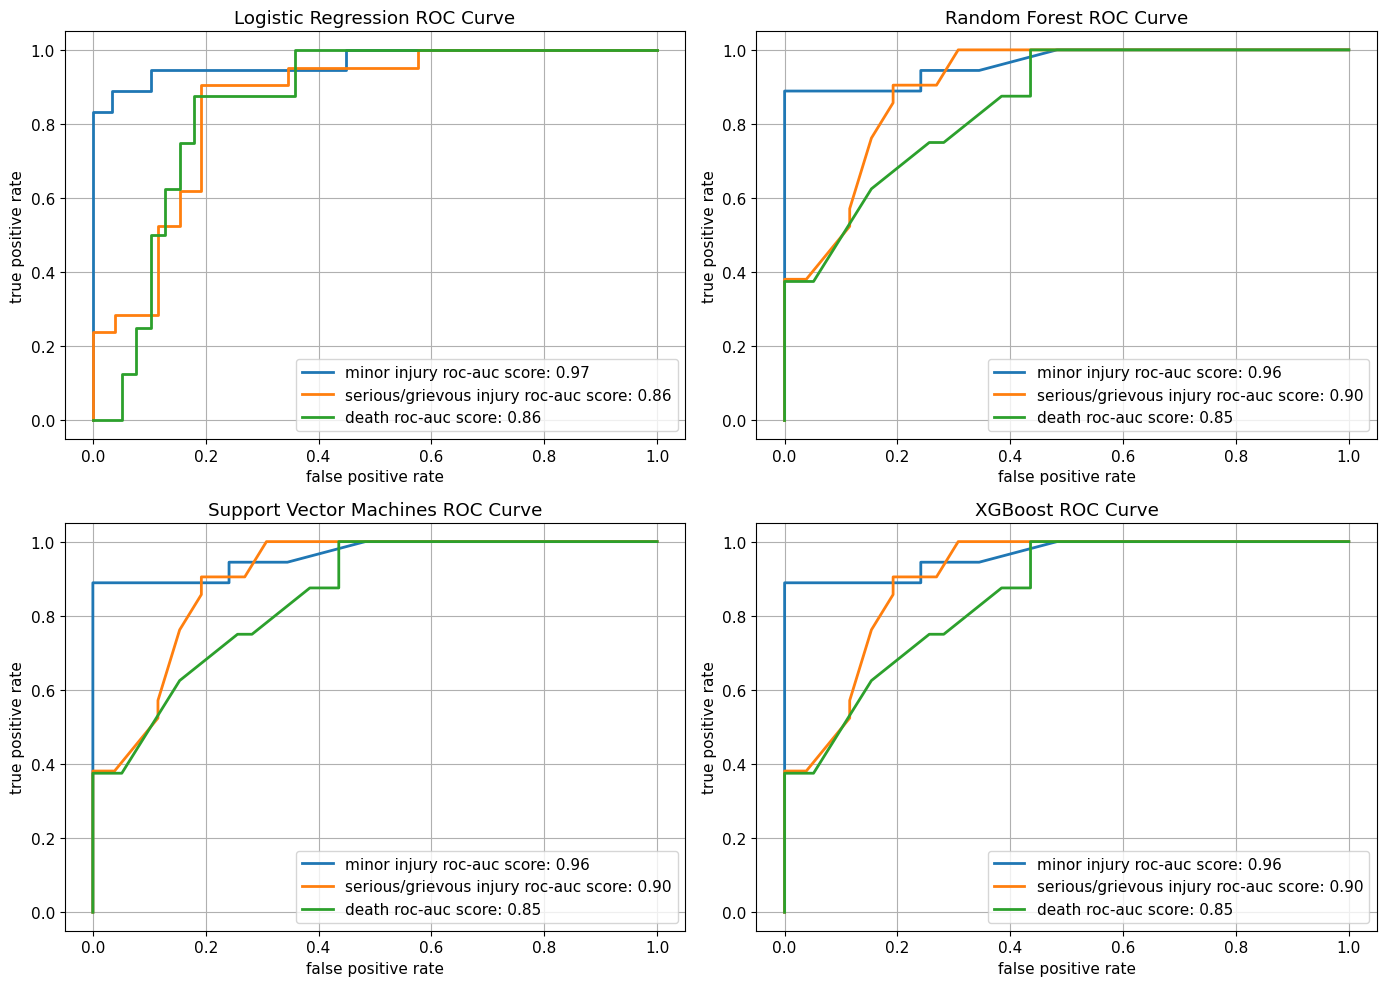

In [ ]:
# ROC curves

plt.rcParams.update({'font.size':11})

plt.figure(figsize=(14, 10))
# Plot 1: LR
plt.subplot(2, 2, 1)
for i in range(n_classes):
    LR_fpr[i], LR_tpr[i], _ = roc_curve(LR_y_test_bin[:, i],
                                  LR_y_pred_score[:, i])
    LR_roc_auc[i] = roc_auc_score(LR_y_test_bin[:, i],
                                  LR_y_pred_score[:, i])
    plt.plot(LR_fpr[i], LR_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {LR_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {LR_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {LR_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Logistic Regression ROC Curve")
plt.grid(True)


# Plot 2: Random Forest
plt.subplot(2, 2, 2)

for i in range(n_classes):
    RF_fpr[i], RF_tpr[i], _ = roc_curve(RF_y_test_bin[:, i],
                                  RF_y_pred_score[:, i])
    RF_roc_auc[i] = roc_auc_score(RF_y_test_bin[:, i],
                                  RF_y_pred_score[:, i])
    plt.plot(RF_fpr[i], RF_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {RF_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {RF_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {RF_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Random Forest ROC Curve")
plt.grid(True)



# Plot 3: SVM
plt.subplot(2, 2, 3)

for i in range(n_classes):
    SVM_fpr[i], SVM_tpr[i], _ = roc_curve(SVM_y_test_bin[:, i],
                                  SVM_y_pred_score[:, i])
    SVM_roc_auc[i] = roc_auc_score(SVM_y_test_bin[:, i],
                                  SVM_y_pred_score[:, i])
    plt.plot(SVM_fpr[i], SVM_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {SVM_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {SVM_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {SVM_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Support Vector Machines ROC Curve")
plt.grid(True)


# Plot 4: XGBoost
plt.subplot(2, 2, 4)

for i in range(n_classes):
    XGBoost_fpr[i], XGBoost_tpr[i], _ = roc_curve(XGBoost_y_test_bin[:, i],
                                  XGBoost_y_pred_score[:, i])
    XGBoost_roc_auc[i] = roc_auc_score(XGBoost_y_test_bin[:, i],
                                  XGBoost_y_pred_score[:, i])
    plt.plot(XGBoost_fpr[i], XGBoost_tpr[i], lw=2, label='class {}'.format(i))


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

label1 = (f"minor injury roc-auc score: {XGBoost_roc_auc[0]:.2f}")
label2 = (f"serious/grievous injury roc-auc score: {XGBoost_roc_auc[1]:.2f}")
label3 = (f"death roc-auc score: {XGBoost_roc_auc[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("XGBoost ROC Curve")
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [214]:
#precision/recall curves

LR_precision = dict()
LR_recall = dict()
LR_rp_auc_score = dict() #pr_auc score

RF_precision = dict()
RF_recall = dict()
RF_rp_auc_score = dict() #pr_auc score

SVM_precision = dict()
SVM_recall = dict()
SVM_rp_auc_score = dict() #pr_auc score

XGBoost_precision = dict()
XGBoost_recall = dict()
XGBoost_rp_auc_score = dict() #pr_auc score


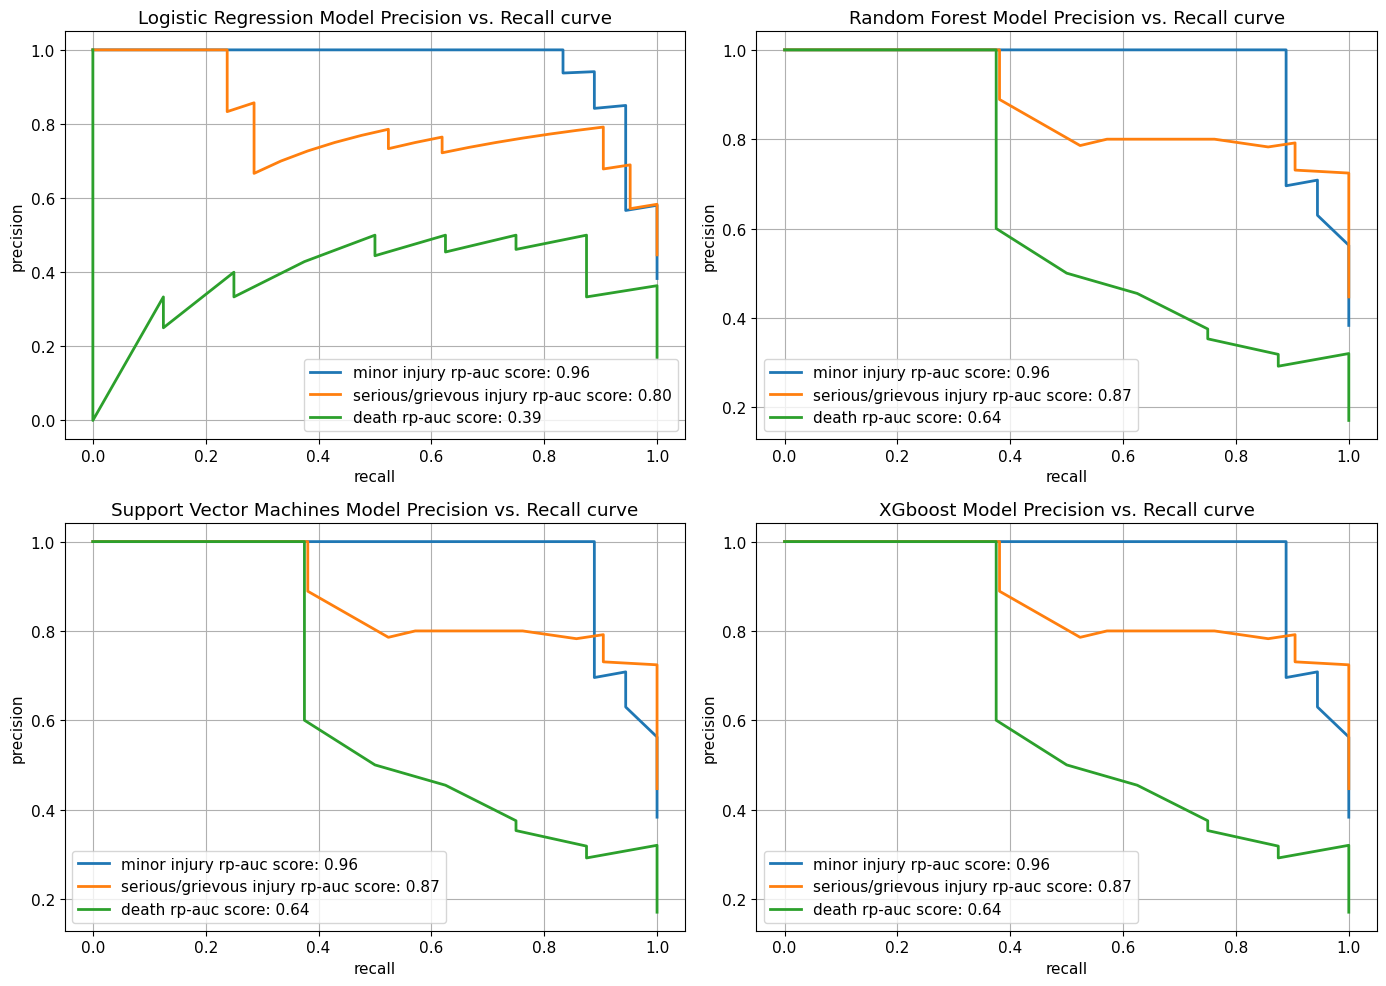

In [ ]:
#precision/recall curves

plt.rcParams.update({'font.size':11})

plt.figure(figsize=(14, 10))

# Plot 1: Logistic Regression
plt.subplot(2, 2, 1)
for i in range(n_classes):
    LR_precision[i], LR_recall[i],_ = precision_recall_curve(LR_y_test_bin[:, i],
                                                        LR_y_pred_score[:,i])
    LR_rp_auc_score[i] = auc(LR_recall[i],LR_precision[i])
    plt.plot(LR_recall[i], LR_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {LR_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {LR_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {LR_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Logistic Regression Model Precision vs. Recall curve")
plt.grid(True)


# Plot 2: Random Forest
plt.subplot(2, 2, 2)
for i in range(n_classes):
    RF_precision[i], RF_recall[i],_ = precision_recall_curve(RF_y_test_bin[:, i],
                                                        RF_y_pred_score[:,i])
    RF_rp_auc_score[i] = auc(RF_recall[i],RF_precision[i])
    plt.plot(RF_recall[i], RF_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {RF_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {RF_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {RF_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Random Forest Model Precision vs. Recall curve")
plt.grid(True)



# Plot 3: SVM
plt.subplot(2, 2, 3)

for i in range(n_classes):
    SVM_precision[i], SVM_recall[i],_ = precision_recall_curve(SVM_y_test_bin[:, i],
                                                        SVM_y_pred_score[:,i])
    SVM_rp_auc_score[i] = auc(SVM_recall[i],SVM_precision[i])
    plt.plot(SVM_recall[i], SVM_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {SVM_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {SVM_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {SVM_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("Support Vector Machines Model Precision vs. Recall curve")
plt.grid(True)


# Plot 4: XGBoost
plt.subplot(2, 2, 4)

for i in range(n_classes):
    XGBoost_precision[i], XGBoost_recall[i],_ = precision_recall_curve(XGBoost_y_test_bin[:, i],
                                                        XGBoost_y_pred_score[:,i])
    XGBoost_rp_auc_score[i] = auc(XGBoost_recall[i],XGBoost_precision[i])
    plt.plot(XGBoost_recall[i], XGBoost_precision[i], lw=2, label='class {}'.format(i))


plt.xlabel("recall")
plt.ylabel("precision")

label1 = (f"minor injury rp-auc score: {XGBoost_rp_auc_score[0]:.2f}")
label2 = (f"serious/grievous injury rp-auc score: {XGBoost_rp_auc_score[1]:.2f}")
label3 = (f"death rp-auc score: {XGBoost_rp_auc_score[2]:.2f}")
plt.legend(labels = [label1, label2, label3],loc="best")
plt.title("XGboost Model Precision vs. Recall curve")
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

5. Feature Importances Comparison
-------------------------------------------------------------

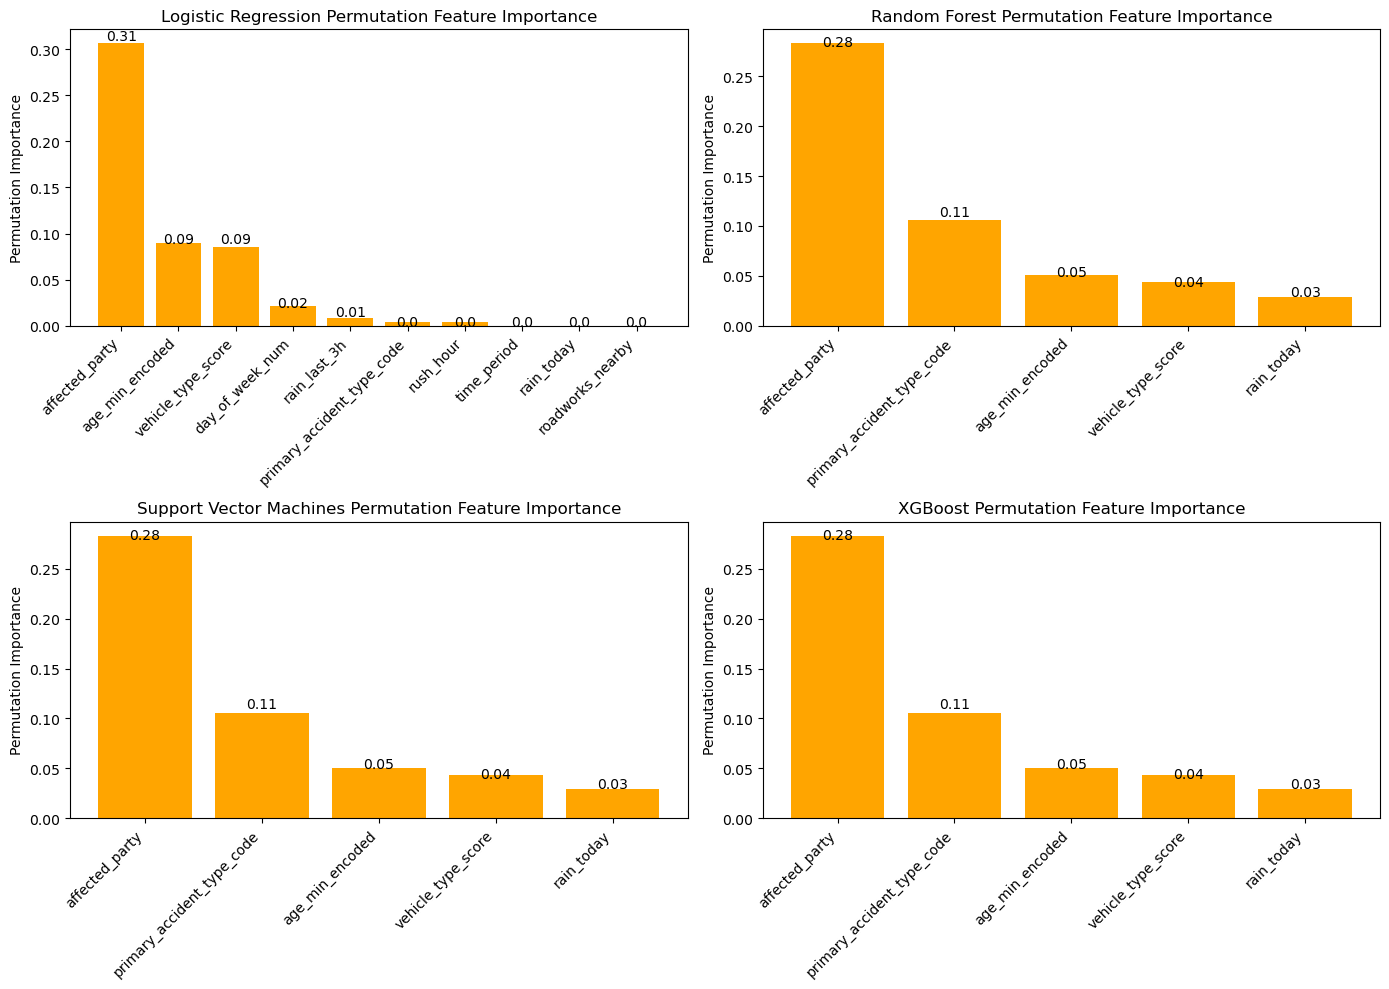

In [232]:
#permutation importance

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2), round(y[i],2), ha='center')  # Aligning text at center

plt.rcParams.update({'font.size':10})

plt.figure(figsize=(14, 10))

# Plot 1: Logistic regression
plt.subplot(2, 2, 1)
plt.bar(LR_perm_import['Feature'], LR_perm_import['Importance'],color='orange')
add_labels(LR_perm_import['Feature'], LR_perm_import['Importance'])

#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Logistic Regression Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Plot 2: Random Forest
plt.subplot(2, 2, 2)
plt.bar(RF_perm_import['Feature'], RF_perm_import['Permutation Importance'],color='orange')
add_labels(RF_perm_import['Feature'], RF_perm_import['Permutation Importance'])

#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Random Forest Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Plot 3: SVM
plt.subplot(2, 2, 3)
plt.bar(SVM_perm_import['Feature'], SVM_perm_import['Permutation Importance'],color='orange')
add_labels(SVM_perm_import['Feature'], SVM_perm_import['Permutation Importance'])

#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Support Vector Machines Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Plot 4: XGBoost
plt.subplot(2, 2, 4)
plt.bar(XGBoost_perm_import['Feature'], XGBoost_perm_import['Permutation Importance'],color='orange')
add_labels(XGBoost_perm_import['Feature'], XGBoost_perm_import['Permutation Importance'])
#plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('XGBoost Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
